In [1]:
import matplotlib as plt
from datetime import datetime, timedelta
from os.path import exists
from spei_calc import *

def generate_imerg_filenames(start_date: datetime, end_date: datetime, dir: str = ""):
    """
    Generate a list of IMERG filenames for each month between start_date and end_date.

    Parameters:
    - start_date (tuple): Start date as (year, month, day).
    - end_date (tuple): End date as (year, month, day).

    Returns:
    - list of strings: Filenames for each month in the specified date range.
    """

    # Ensure the start date is the first of the month
    start_date = start_date.replace(day=1)

    # Add trailing slash if needed
    if dir:
        if dir[-1] != "/":
            dir += "/"

    file_names = []

    current = start_date
    while current <= end_date:
        # Generate filename
        file_name = f"{dir}3B-MO.MS.MRG.3IMERG.{current.strftime('%Y%m%d')}-S000000-E235959.{current.strftime('%m')}.V07B.HDF5.nc4"
        if exists(file_name):
            file_names.append(file_name)
        else:
            print(f"File '{file_name}' does not exist.")

        # Move to the next month
        # Adding a month to a datetime object is tricky because not all months have the same number of days.
        # This method handles the end-of-month edge cases.
        next_month = current.replace(
            day=28) + timedelta(days=4)  # this will never fail
        current = next_month - timedelta(days=next_month.day - 1)

    return file_names


def generate_t2m_filenames(start_date: datetime, end_date: datetime, dir: str = ""):
    file_names = []

    # Ensure the start date is the first of the month
    start_date = start_date.replace(day=1)

    # Add trailing slash if needed
    if dir:
        if dir[-1] != "/":
            dir += "/"

    current = start_date
    while current <= end_date:
        # Generate filename
        file_name = f"{dir}t2m_{current.strftime('%Y%m')}.nc"
        if exists(file_name):
            file_names.append(file_name)
        else:
            print(f"File '{file_name}' does not exist.")

        # Move to the next month
        # Adding a month to a datetime object is tricky because not all months have the same number of days.
        # This method handles the end-of-month edge cases.
        next_month = current.replace(
            day=28) + timedelta(days=4)
        current = next_month - timedelta(days=next_month.day - 1)

    return file_names

In [2]:
# Define dates
day = 1
date_begin = datetime(2014, 4, day)
date_end = datetime(2014, 4, day)

In [3]:
# Precipitation
prec_file_paths = generate_imerg_filenames(
    date_begin, date_end, "/media/jtrvz/1tb/drought_data/precipitation/nasa_gpm/Global/monthly/netcdf/avg/")
# Temperature
temp_file_paths = generate_t2m_filenames(
    date_begin, date_end, "/media/jtrvz/1tb/drought_data/temperature/era5/Global/monthly/netcdf/avg/")

In [4]:
# Load nc files
prec_ds = load_nc_files(prec_file_paths)
temp_ds = load_nc_files(temp_file_paths)

In [5]:
# Preprocess datasets
prec_ds = preprocess_prec(prec_ds)
temp_ds = preprocess_temp(temp_ds)

Longitude conversion...


In [6]:
temp_ds

<xarray.Dataset> Size: 52MB
Dimensions:  (time: 1, lat: 1801, expver: 2, lon: 3600)
Coordinates:
  * time     (time) datetime64[ns] 8B 2014-04-01
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * expver   (expver) int32 8B 1 5
  * lon      (lon) float32 14kB -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Data variables:
    t2m      (time, expver, lat, lon) float32 52MB dask.array<chunksize=(1, 2, 1801, 3600), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Feb 21 17:15:59 2024: cdo splityearmon data.nc t2m_\n20...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [7]:
prec_ds

<xarray.Dataset> Size: 130MB
Dimensions:                         (time: 1, lat: 1800, lon: 3600, latv: 2,
                                     nv: 2, lonv: 2)
Coordinates:
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
  * latv                            (latv) int32 8B 0 1
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lonv                            (lonv) int32 8B 0 1
  * nv                              (nv) int32 8B 0 1
  * time                            (time) datetime64[ns] 8B 2014-04-01
Data variables:
    precipitationQualityIndex       (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    lat_bnds                        (lat, latv) float32 14kB dask.array<chunksize=(1024, 2), meta=np.ndarray>
    precipitation                   (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    time_bnds                       (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (lon, lonv) float32 29kB dask.array<chunksize=(1024, 2), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-MONTH/07;\nDOIa...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-02-20 12:16:37 GMT Hyrax-1.16.3 htt...

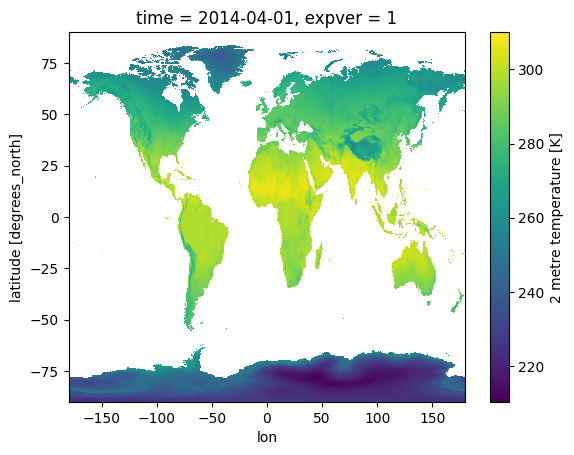

In [8]:
temp_ds_plot = temp_ds["t2m"].isel(expver=0)
temp_ds_plot.plot()

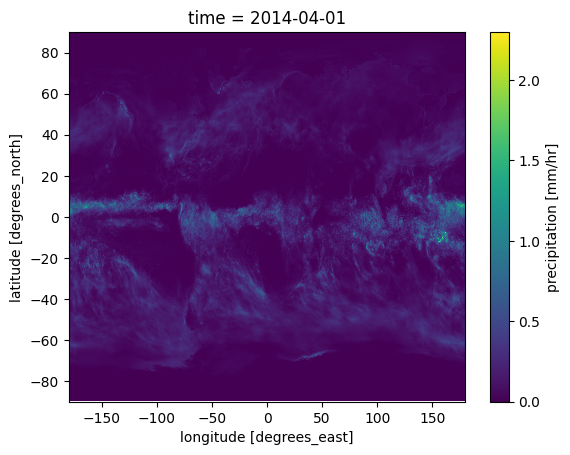

In [9]:
prec_ds["precipitation"].plot()

In [10]:
# Lat and lon bounds for Germany
lat_bounds = [47.0, 55.0]
lon_bounds = [5.5, 15.0]

In [11]:
# Spatial subset Germany
prec_ds = spatial_subset(prec_ds, lat_bounds, lon_bounds)
temp_ds = spatial_subset(temp_ds, lat_bounds, lon_bounds)

In [12]:
prec_ds

<xarray.Dataset> Size: 154kB
Dimensions:                         (time: 1, lat: 80, lon: 95, latv: 2, nv: 2,
                                     lonv: 2)
Coordinates:
  * lat                             (lat) float32 320B 47.05 47.15 ... 54.95
  * latv                            (latv) int32 8B 0 1
  * lon                             (lon) float32 380B 5.55 5.65 ... 14.85 14.95
  * lonv                            (lonv) int32 8B 0 1
  * nv                              (nv) int32 8B 0 1
  * time                            (time) datetime64[ns] 8B 2014-04-01
Data variables:
    precipitationQualityIndex       (time, lat, lon) float32 30kB dask.array<chunksize=(1, 80, 95), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lat, lon) float32 30kB dask.array<chunksize=(1, 80, 95), meta=np.ndarray>
    lat_bnds                        (lat, latv) float32 640B dask.array<chunksize=(80, 2), meta=np.ndarray>
    precipitation                   (time, lat, lon) float32 30kB dask.array<chunksize=(1, 80, 95), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 30kB dask.array<chunksize=(1, 80, 95), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 30kB dask.array<chunksize=(1, 80, 95), meta=np.ndarray>
    time_bnds                       (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (lon, lonv) float32 760B dask.array<chunksize=(95, 2), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-MONTH/07;\nDOIa...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-02-20 12:16:37 GMT Hyrax-1.16.3 htt...

In [13]:
temp_ds

<xarray.Dataset> Size: 63kB
Dimensions:  (time: 1, lat: 81, expver: 2, lon: 96)
Coordinates:
  * time     (time) datetime64[ns] 8B 2014-04-01
  * lat      (lat) float32 324B 47.0 47.1 47.2 47.3 47.4 ... 54.7 54.8 54.9 55.0
  * expver   (expver) int32 8B 1 5
  * lon      (lon) float32 384B 5.5 5.6 5.7 5.8 5.9 ... 14.6 14.7 14.8 14.9 15.0
Data variables:
    t2m      (time, expver, lat, lon) float32 62kB dask.array<chunksize=(1, 2, 81, 96), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Feb 21 17:15:59 2024: cdo splityearmon data.nc t2m_\n20...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

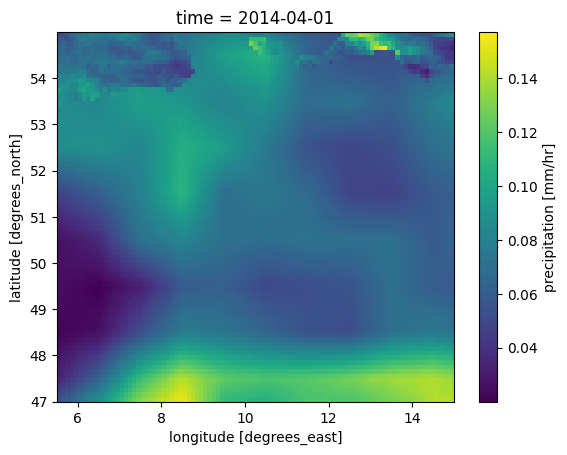

In [14]:
prec_ds["precipitation"].plot()

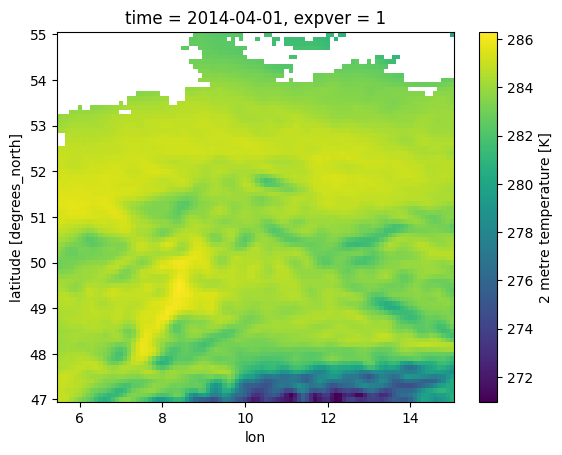

In [15]:
temp_ds_plot = temp_ds["t2m"].isel(expver=0)
temp_ds_plot.plot()

In [16]:
# Calculate PET (potential evapotranspiration)
pet_ds = calc_pet_thornthwaite(temp_ds, prec_ds)

In [17]:
pet_ds

<xarray.Dataset> Size: 125kB
Dimensions:  (time: 1, lat: 81, expver: 2, lon: 96, month: 1)
Coordinates:
  * time     (time) datetime64[ns] 8B 2014-04-01
  * lat      (lat) float32 324B 47.0 47.1 47.2 47.3 47.4 ... 54.7 54.8 54.9 55.0
  * expver   (expver) int32 8B 1 5
  * lon      (lon) float32 384B 5.5 5.6 5.7 5.8 5.9 ... 14.6 14.7 14.8 14.9 15.0
  * month    (month) int64 8B 4
Data variables:
    t2m      (time, expver, lat, lon, month) float64 124kB dask.array<chunksize=(1, 2, 81, 96, 1), meta=np.ndarray>

In [18]:
pet_ds, prec_ds = preprocess_pet(pet_ds, prec_ds)

In [19]:
pet_ds.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [20]:
# Calculate difference
diff_ds = calc_difference(prec_ds, pet_ds)
print(diff_ds.values)

<bound method Mapping.values of <xarray.Dataset> Size: 744B
Dimensions:  (lat: 80, latv: 2, lon: 95, lonv: 2, nv: 2, time: 1, month: 1)
Coordinates:
  * lat      (lat) float32 320B 47.05 47.15 47.25 47.35 ... 54.75 54.85 54.95
  * latv     (latv) int32 8B 0 1
  * lon      (lon) float32 380B 5.55 5.65 5.75 5.85 ... 14.65 14.75 14.85 14.95
  * lonv     (lonv) int32 8B 0 1
  * nv       (nv) int32 8B 0 1
  * time     (time) datetime64[ns] 8B 2014-04-01
    expver   int32 4B 1
  * month    (month) int64 8B 4
Data variables:
    *empty*>


In [21]:
# Calculate CDF values
cdf_vals = calc_cdf_values(diff_ds)

<class 'method'>


AttributeError: 'function' object has no attribute 'flatten'

In [ ]:
spei_ds = spei(diff_ds, cdf_vals)

In [ ]:
spei.plot()
plt.title('SPEI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('test.png', dpi=300, format='png')